### Prevendo a ocorrência de Diabetes

Importando as bibliotecas que serão usadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

Carregando o conjunto de dados diabetes.csv

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
# Verificando número de linhas e colunas
diabetes_df.shape

(768, 9)

In [5]:
# Exibindo as 5 primeiras linhas
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Verificando se há valores nulos
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

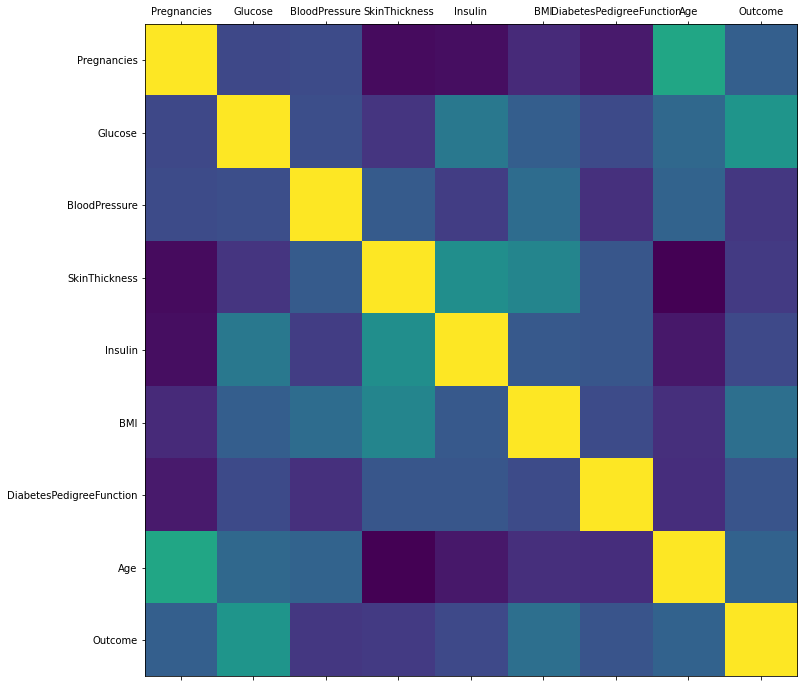

In [11]:
# Identificando a correlação entre as variáveis

# Usando uma função para plotar um heatmap

def plot_corr(diabetes_df, size=12):
    corr = diabetes_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
   
    
plot_corr(diabetes_df)

In [12]:
# Correlação através de tabela
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
# Verificando como os dados estão distribuídos
num_true = len(diabetes_df.loc[diabetes_df['Outcome'] == True])
num_false = len(diabetes_df.loc[diabetes_df['Outcome'] == False])
print(f'Número de casos Verdadeiros: {num_true}, ({num_true / (num_true + num_false)* 100:.2f}%)')
print(f'Número de casos Falsos: {num_false}, ({num_false / (num_true + num_false)* 100:.2f}%)')

Número de casos Verdadeiros: 268, (34.90%)
Número de casos Falsos: 500, (65.10%)


#### Separando os dados em dados de treino e de teste
70% para treino e 30% para teste

In [14]:
# Seleção de variáveis preditoras
atributos = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [15]:
# Variável-alvo, a ser prevista
atrib_prev = ['Outcome']

In [16]:
# Criando os objetos
X = diabetes_df[atributos].values
y = diabetes_df[atrib_prev].values

In [17]:
# Exibindo o objeto X
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [18]:
# Exibindo o objeto y
print(y)

[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]


In [19]:
# Criando os dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [20]:
# Exibindo os resultados
print(f'{len(X_train) / len(diabetes_df.index) * 100:.2f}% nos ddos de treino.')
print(f'{len(X_test) / len(diabetes_df.index) * 100:.2f}% nos dados de teste.')

69.92% nos ddos de treino.
30.08% nos dados de teste.


In [21]:
# Verificando se há valores ausentes
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
# Verificando se realmente não há valores ausentes
print('# Linhas no dataframe {0}'.format(len(diabetes_df)))
print('# Linhas missing Glucose: {0}'.format(len(diabetes_df.loc[diabetes_df['Glucose'] == 0])))
print('# Linhas missing Pregnancies: {0}'.format(len(diabetes_df.loc[diabetes_df['Pregnancies'] == 0])))
print('# Linhas missing BloodPressure: {0}'.format(len(diabetes_df.loc[diabetes_df['BloodPressure'] ==0])))
print('# Linhas missing SkinThickness: {0}'.format(len(diabetes_df.loc[diabetes_df['SkinThickness'] == 0])))
print('# Linhas missing Insulin: {0}'.format(len(diabetes_df.loc[diabetes_df['Insulin'] == 0])))
print('# Linhas missing BMI: {0}'.format(len(diabetes_df.loc[diabetes_df['BMI'] == 0])))
print('# Linhas missing DiabetesPedigreeFunction: {0}'.format(len(diabetes_df.loc[diabetes_df['DiabetesPedigreeFunction'] == 0])))
print('# Linhas missing Age: {0}'.format(len(diabetes_df.loc[diabetes_df['Age'] == 0])))


# Linhas no dataframe 768
# Linhas missing Glucose: 5
# Linhas missing Pregnancies: 111
# Linhas missing BloodPressure: 35
# Linhas missing SkinThickness: 227
# Linhas missing Insulin: 374
# Linhas missing BMI: 11
# Linhas missing DiabetesPedigreeFunction: 0
# Linhas missing Age: 0


O código acima nos mostra que sim, há valores ausentes.<br>Esses valores precisam ser tratados e nesse caso iremos substituir os valores ausentes pela média dos dados

In [24]:
# Substituindo os valores iguais a zero pela média dos dados
preenche_0 = SimpleImputer(missing_values=0, strategy='mean')
X_train = preenche_0.fit_transform(X_train)
X_test = preenche_0.fit_transform(X_test)

Construindo e treinando o modelo com classificador Naive Bayes

In [25]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [26]:
# Treinando o modelo
# Usar função ravel para ajustar o shape do objeto
modelo_v1.fit(X_train, y_train.ravel())

GaussianNB()

Verificando a exatidão do modelo nos dados de treino

In [27]:
nb_predict_train = modelo_v1.predict(X_train)
print(f'Exatidão (Accuracy): {metrics.accuracy_score(y_train, nb_predict_train):.4f}')

Exatidão (Accuracy): 0.7542


Verificando a exatidão nos dados de teste

In [29]:
nb_predict_test = modelo_v1.predict(X_test)
print(f'Exatidão (Accuracy): {metrics.accuracy_score(y_test, nb_predict_test):.4f}')

Exatidão (Accuracy): 0.7359


Métricas

In [30]:
# Criando a matriz de confusão
print('Matriz de Confusão')
print(f'{metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])}')

Matriz de Confusão
[[ 52  28]
 [ 33 118]]


In [31]:
# Classification Report
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



A precisão é a proporção de verdadeiros positivos entre todas as previsões positivas.<p>O recall é a proporção de verdadeiros positivos entre todos os elementos da classe.</p><p>A pontuação F1 é a média harmônica entre precisão e recall.</p><p>O suporte é o número de ocorrências de cada classe no conjunto de dados verdadeiros.</p>

#### Otimizando o modelo com Random Forest

In [32]:
modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [33]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_train)
print(f'Exatidão (Accuracy): {metrics.accuracy_score(y_train, rf_predict_train)}')

Exatidão (Accuracy): 1.0


In [34]:
# Verificando os dados de teste
rf_predict_test = modelo_v2.predict(X_test)
print(f'Exatidão (Accuracy): {metrics.accuracy_score(y_test, rf_predict_test):.2f}')

Exatidão (Accuracy): 0.74


In [36]:
# Exibindo a matriz de confusão e o Classification Report
print("Matriz de Confusão")
print(f'{metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])}')

print('Classification Report')
print(f'{metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])}')

Matriz de Confusão
[[ 52  28]
 [ 32 119]]
Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Comparando esses dados com o uso do classificador naive_bayes, nota-se que não há uma melhora significativa do modelo

#### Regressão Logística - terceira versão do modelo

In [39]:
modelo_v3 = LogisticRegression(C = 0.7, random_state=42)
modelo_v3.fit(X_train, y_train.ravel())
lr_predict_test = modelo_v3.predict(X_test)

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Exibindo a exatidão e o Classification Report
print(f'Exatidão (Accuracy): {metrics.accuracy_score(y_test, lr_predict_test):.2f}')
print('')
print('Classification Report')
print(f'{metrics.classification_report(y_test, lr_predict_test, labels = [1, 0])}')

Exatidão (Accuracy): 0.75

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.60      0.62        80
           0       0.80      0.83      0.81       151

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



Pode-se notar que houve uma pequena melhora do modelo com regressão logística, então vamos usá-lo para fazer as previsões

In [41]:
# Salvar o modelo para uso mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [42]:
X_test

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [43]:
# Carregando o modelo e fazendo previsão com novos conjunto de dados
loaded_model = pickle.load(open(filename, 'rb'))

resultado1 = loaded_model.predict(X_test[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_test[18].reshape(1, -1))

print(resultado1)
print(resultado2)

[0]
[1]
